In [2]:
!pip install dask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn import decomposition, preprocessing, cluster, tree
import dask.dataframe as dd

In [28]:
peptide_file = "PD-datasets/train_peptides.csv"
peptides = dd.read_csv(peptide_file,dtype=
                     {"visit_id": object, 
                      "visit_month": int, 
                      "patient_id": int,
                      "UniProt": object,
                      "Peptide": object,
                      "PeptideAbundance": float,
                      })
peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
npartitions=1,,,,,,
,object,int64,int64,object,object,float64
,...,...,...,...,...,...


In [29]:
proteins_file = "PD-datasets/train_proteins.csv"
proteins = dd.read_csv(proteins_file,dtype=
                      {"visit_id": object,
                      "visit_month": int,
                      "patient_id": int,
                      "UniProt": object,
                      "NPX": float})
proteins

,visit_id,visit_month,patient_id,UniProt,NPX
npartitions=1,,,,,
,object,int64,int64,object,float64
,...,...,...,...,...


In [44]:
clinical_file = "PD-datasets/train_clinical_data.csv"
clinical = dd.read_csv(clinical_file,dtype=
                      {"visit_id": object,
                      "patient_id": int,
                      "visit_month":int,
                      "updrs_1": float,
                      "updrs_2": float,
                      "updrs_3": float,
                      "updrs_4": float,
                      "upd23b_clinical_state_on_medication": object})
clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
npartitions=1,,,,,,,,
,object,int64,int64,float64,float64,float64,float64,object
,...,...,...,...,...,...,...,...


In [45]:
# merge all of the datasets together
protpep = dd.merge(left=peptides,right=proteins,how='outer',on="visit_id")

In [46]:
protpep

,visit_id,visit_month_x,patient_id_x,UniProt_x,Peptide,PeptideAbundance,visit_month_y,patient_id_y,UniProt_y,NPX
npartitions=1,,,,,,,,,,
,object,int64,int64,object,object,float64,int64,int64,object,float64
,...,...,...,...,...,...,...,...,...,...


In [47]:
protpep = protpep.drop(columns=["visit_month_y", "patient_id_y"])

In [48]:
protpep.columns

Index(['visit_id', 'visit_month_x', 'patient_id_x', 'UniProt_x', 'Peptide',
       'PeptideAbundance', 'UniProt_y', 'NPX'],
      dtype='object')

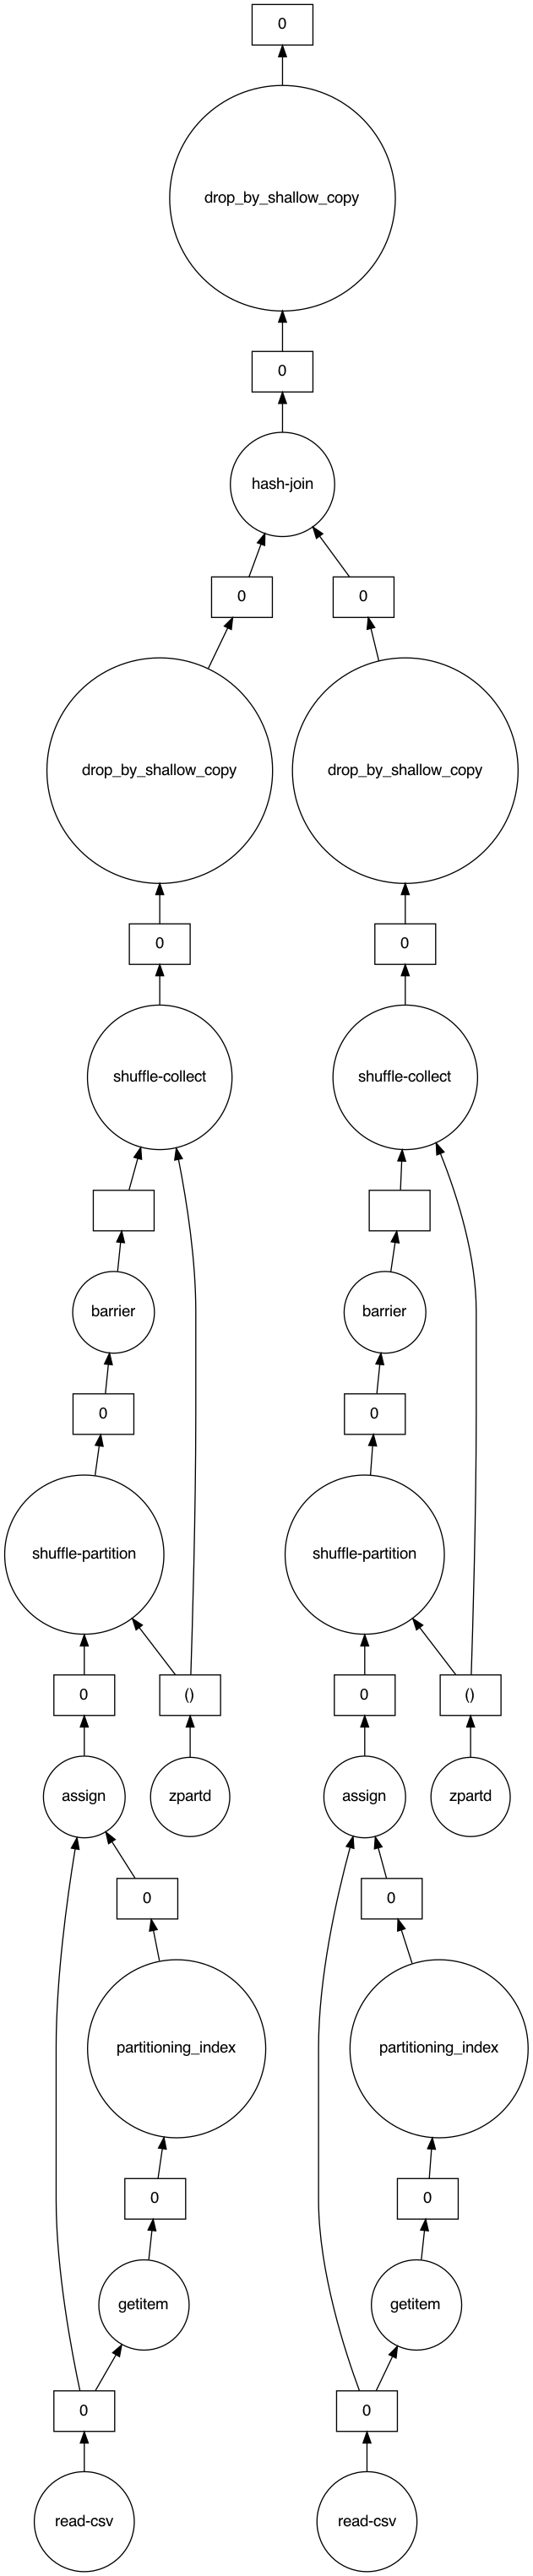

In [49]:
protpep.visualize()

In [50]:
merged_df = dd.merge(left=protpep,right=clinical,how='outer',on="visit_id")

In [51]:
#take a look at the data and identify what needs to be done to prepare for ML
merged_df.columns

Index(['visit_id', 'visit_month_x', 'patient_id_x', 'UniProt_x', 'Peptide',
       'PeptideAbundance', 'UniProt_y', 'NPX', 'patient_id', 'visit_month',
       'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
       'upd23b_clinical_state_on_medication'],
      dtype='object')

In [52]:
merged_df.dtypes

visit_id                                object
visit_month_x                            int64
patient_id_x                             int64
UniProt_x                               object
Peptide                                 object
PeptideAbundance                       float64
UniProt_y                               object
NPX                                    float64
patient_id                               int64
visit_month                              int64
updrs_1                                float64
updrs_2                                float64
updrs_3                                float64
updrs_4                                float64
upd23b_clinical_state_on_medication     object
dtype: object

In [53]:
cleaned_df = merged_df.drop(columns=["visit_month","patient_id"])

In [ ]:
cleaned_df.head()

In [42]:
cleaned_df = pd.get_dummies(cleaned_df, columns=["visit_id","UniProt_x","Peptide","UniProt_y","upd23b_clinical_state_on_medication"])

ValueError: The truth value of a DataFrame is ambiguous. Use a.any() or a.all().

In [ ]:
# PCA

X = #cleaned data will go here
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

In [ ]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X

In [ ]:
# plot PCs and dendrogram